# Machine Learning model for Uber & Lyft Cab prices versus Weather Conditions

Data from Kaggle: https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma

* Content (copied from Kaggle data page)

Uber vs Lyft
This is a very beginner-friendly dataset. It does contain a lot of NA values. It is a good dataset if you want to use a Linear Regression Model to see the pattern between different predectors such as hour and price.

A really amazing part of this dataset is that I have included the corresponding weather data for that hour with a short summary of the weather. Other important factors are temperature, wind, and sunset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential # Keras API is packaged inside Tensorflow
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
Rides = pd.read_csv('Uber_Lyft_Boston/rideshare_kaggle.csv')

In [6]:
Rides.head().transpose()

,0,1,2,3,4
id,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,4bd23055-6827-41c6-b23b-3c491f24e74d,981a3613-77af-4620-a42a-0c0866077d1e,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,e0126e1f-8ca9-4f2e-82b3-50505a09db9a
timestamp,1.54495e+09,1.54328e+09,1.54337e+09,1.54355e+09,1.54346e+09
hour,9,2,1,4,3
day,16,27,28,30,29
month,12,11,11,11,11
datetime,2018-12-16 09:30:07,2018-11-27 02:00:23,2018-11-28 01:00:22,2018-11-30 04:53:02,2018-11-29 03:49:20
timezone,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York
source,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square
destination,North Station,North Station,North Station,North Station,North Station
cab_type,Lyft,Lyft,Lyft,Lyft,Lyft


In [6]:
Rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [22]:
Rides['product_id'].value_counts()

6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    55095
6c84fd89-3f11-4782-9b50-97c468b19529    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_lux                                51235
lyft_premier                            51235
lyft_plus                               51235
lyft_luxsuv                             51235
lyft                                    51235
lyft_line                               51233
Name: product_id, dtype: int64

In [23]:
Rides['cab_type'].value_counts()

Uber    385663
Lyft    307408
Name: cab_type, dtype: int64

In [24]:
Rides['name'].value_counts()

WAV             55096
Black SUV       55096
UberXL          55096
Black           55095
Taxi            55095
UberX           55094
UberPool        55091
Lux Black       51235
Lux Black XL    51235
Lyft            51235
Lyft XL         51235
Lux             51235
Shared          51233
Name: name, dtype: int64

In [7]:
Rides['datetime_new'] = pd.to_datetime(Rides['datetime'])
Rides['datetime_new'] = Rides['datetime_new'].apply(lambda date: date.dayofweek)
Rides['DayOfWeek'] = Rides['datetime_new'].map({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'})
Rides.drop('datetime_new',axis=1,inplace=True)

In [8]:
Rides['DayOfWeek'].value_counts()

Tue    124949
Mon    124216
Thu     98505
Sun     91530
Sat     90168
Fri     90012
Wed     73691
Name: DayOfWeek, dtype: int64

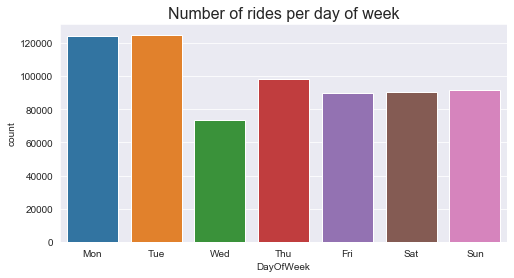

In [10]:
plt.figure(figsize=(8,4))
plt.title('Number of rides per day of week', fontsize=16)
sns.countplot(x='DayOfWeek', data=Rides, order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

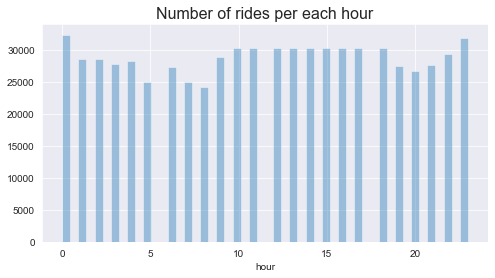

In [11]:
plt.figure(figsize=(8,4))
plt.title('Number of rides per each hour', fontsize=16)
sns.distplot(Rides['hour'],kde=False)

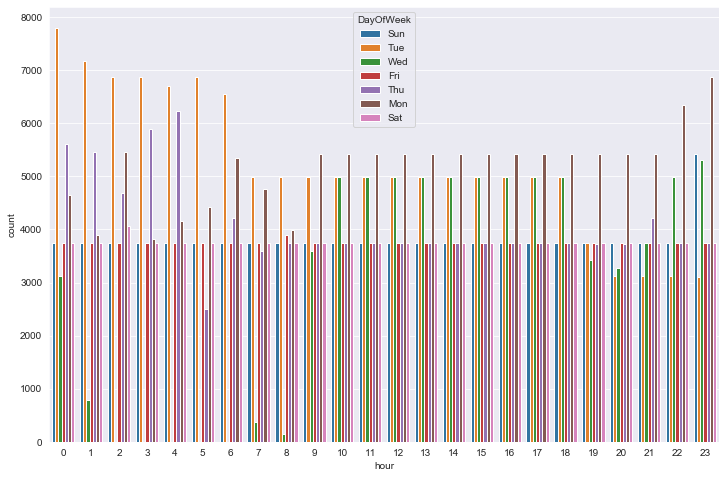

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(x='hour', data=Rides, hue='DayOfWeek')

#### Seems like weather condition on it's own is not a good predictore of change in number of ride requests

In [9]:
Rides['short_summary'].unique()

array([' Mostly Cloudy ', ' Rain ', ' Clear ', ' Partly Cloudy ',
       ' Overcast ', ' Light Rain ', ' Foggy ', ' Possible Drizzle ',
       ' Drizzle '], dtype=object)

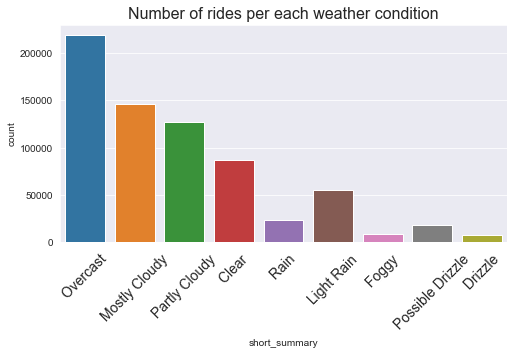

In [139]:
order_w=[' Overcast ', ' Mostly Cloudy ', ' Partly Cloudy ', ' Clear ',
         ' Rain ', ' Light Rain ', ' Foggy ', ' Possible Drizzle ', ' Drizzle ']
plt.figure(figsize=(8,4))
plt.title('Number of rides per each weather condition', fontsize=16)
plt.xticks(rotation=45, fontsize=14) 
sns.countplot(x='short_summary', data=Rides, order=order_w)

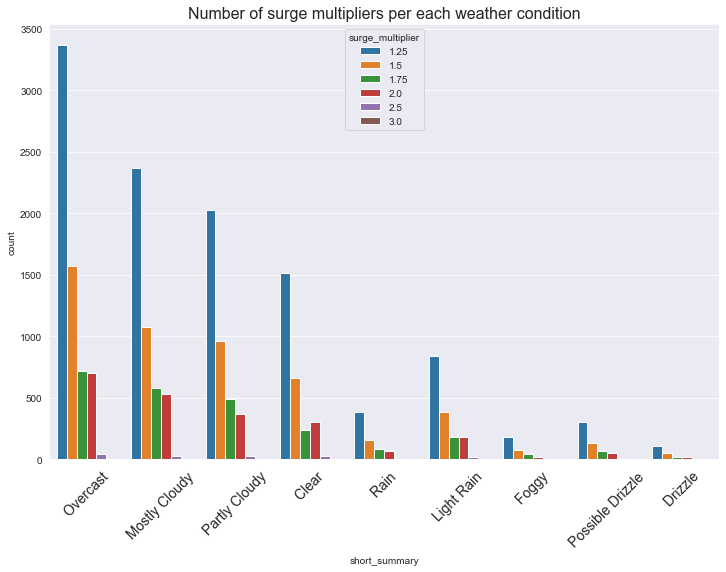

In [138]:
order_w=[' Overcast ', ' Mostly Cloudy ', ' Partly Cloudy ', ' Clear ',
         ' Rain ', ' Light Rain ', ' Foggy ', ' Possible Drizzle ', ' Drizzle ']
plt.figure(figsize=(12,8))
plt.title('Number of surge multipliers per each weather condition', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
sns.countplot(x='short_summary', data=Rides[Rides['surge_multiplier'] > 1], hue='surge_multiplier',order=order_w)

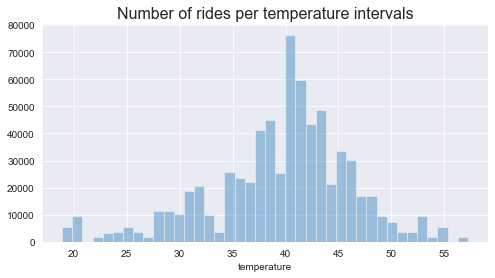

In [16]:
plt.figure(figsize=(8,4))
plt.title('Number of rides per temperature intervals', fontsize=16)
sns.distplot(Rides['temperature'],kde=False, bins=40)

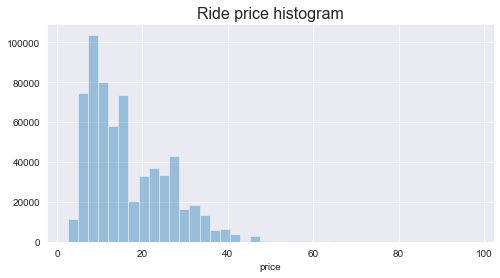

In [17]:
plt.figure(figsize=(8,4))
plt.title('Ride price histogram', fontsize=16)
sns.distplot(Rides['price'],kde=False, bins=40)

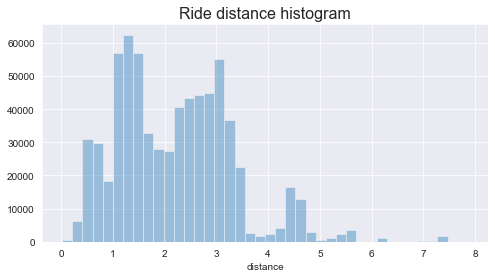

In [18]:
plt.figure(figsize=(8,4))
plt.title('Ride distance histogram', fontsize=16)
sns.distplot(Rides['distance'],kde=False, bins=40)

In [16]:
Rides['hours_index']=Rides['datetime'].apply(lambda text: text[0:13])

In [100]:
Rides_hourly = pd.DataFrame(data=Rides.groupby('hours_index').count()['id'])
Rides_hourly.reset_index(inplace = True) 
Rides_hourly.columns=['hours_index', 'NumberOfRides']

In [101]:
Rides_hourly['Ave_Price'] = Rides.groupby('hours_index').mean()['price'].values
Rides_hourly['Ave_SurgeMultiplier'] = Rides.groupby('hours_index').mean()['surge_multiplier'].values
Rides_hourly['Ave_Distance'] = Rides.groupby('hours_index').mean()['distance'].values

In [105]:
# Assigning the most common weather condition druing that time period
Rides_hourly['Ave_WeatherCondition'] = Rides.groupby('hours_index')['short_summary'].agg(lambda x:x.value_counts().index[0]).values

In [103]:
Rides_hourly['Ave_Temperature'] = Rides.groupby('hours_index').mean()['temperature'].values
Rides_hourly['Ave_PrecipIntensity'] = Rides.groupby('hours_index').mean()['precipIntensity'].values
Rides_hourly['Ave_PrecipProbability'] = Rides.groupby('hours_index').mean()['precipProbability'].values
Rides_hourly['Ave_dewPoint'] = Rides.groupby('hours_index').mean()['dewPoint'].values
Rides_hourly['Ave_Humidity'] = Rides.groupby('hours_index').mean()['humidity'].values
Rides_hourly['Ave_WindSpeed'] = Rides.groupby('hours_index').mean()['windSpeed'].values
Rides_hourly['Ave_Pressure'] = Rides.groupby('hours_index').mean()['pressure'].values
Rides_hourly['Ave_CloudCover'] = Rides.groupby('hours_index').mean()['cloudCover'].values
Rides_hourly['Ave_uvIndex'] = Rides.groupby('hours_index').mean()['uvIndex'].values

In [106]:
Rides_hourly.head(5)

,hours_index,NumberOfRides,Ave_Price,Ave_SurgeMultiplier,Ave_Distance,Ave_WeatherCondition,Ave_Temperature,Ave_PrecipIntensity,Ave_PrecipProbability,Ave_dewPoint,Ave_Humidity,Ave_WindSpeed,Ave_Pressure,Ave_CloudCover,Ave_uvIndex
0,2018-11-26 03,84,18.694805,1.029762,2.496071,Foggy,41.83,0.0,0.0,39.62,0.92,0.51,1014.10,1.0,0
1,2018-11-26 04,420,16.537179,1.013095,2.191310,Overcast,41.52,0.0,0.0,38.76,0.90,0.45,1014.06,1.0,0
2,2018-11-26 05,672,16.482955,1.015997,2.218051,Overcast,41.99,0.0,0.0,39.54,0.91,0.53,1014.11,1.0,0
3,2018-11-26 06,1596,16.525992,1.016917,2.153020,Overcast,41.83,0.0,0.0,39.60,0.92,1.83,1014.32,1.0,0
4,2018-11-26 07,1008,16.249730,1.008185,2.138819,Overcast,42.02,0.0,0.0,39.47,0.91,2.01,1014.24,1.0,0


In [89]:
len(Rides_hourly)

332

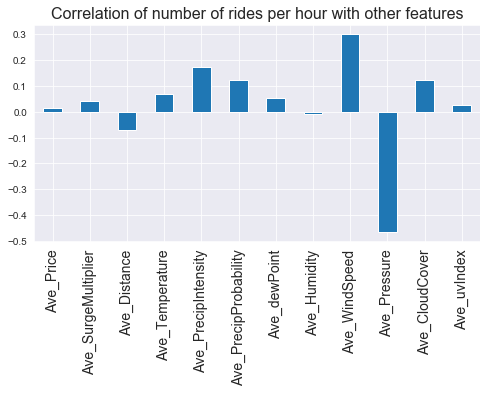

In [131]:
plt.figure(figsize=(8,4))
plt.title('Correlation of number of rides per hour with other features', fontsize=16)
plt.xticks(fontsize=14, rotation=45)
Rides_hourly.corr()['NumberOfRides'].drop('NumberOfRides').plot(kind='bar')

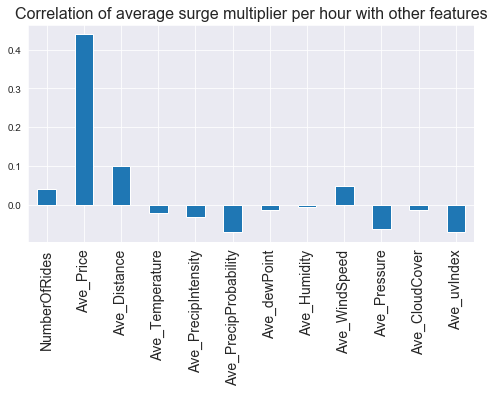

In [133]:
plt.figure(figsize=(8,4))
plt.title('Correlation of average surge multiplier per hour with other features', fontsize=16)
plt.xticks(fontsize=14, rotation=45)
Rides_hourly.corr()['Ave_SurgeMultiplier'].drop('Ave_SurgeMultiplier').plot(kind='bar')

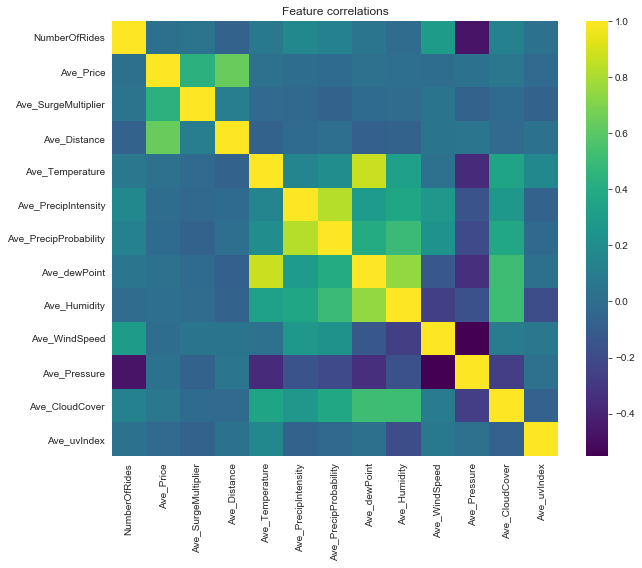

In [137]:
plt.figure(figsize=(10,8))
plt.title('Feature correlations')
sns.heatmap(Rides_hourly.corr(), cmap='viridis') #, annot=True)

In [81]:
Rides.head().transpose()

,0,1,2,3,4
id,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,4bd23055-6827-41c6-b23b-3c491f24e74d,981a3613-77af-4620-a42a-0c0866077d1e,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,e0126e1f-8ca9-4f2e-82b3-50505a09db9a
timestamp,1.54495e+09,1.54328e+09,1.54337e+09,1.54355e+09,1.54346e+09
hour,9,2,1,4,3
day,16,27,28,30,29
month,12,11,11,11,11
datetime,2018-12-16 09:30:07,2018-11-27 02:00:23,2018-11-28 01:00:22,2018-11-30 04:53:02,2018-11-29 03:49:20
timezone,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York
source,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square
destination,North Station,North Station,North Station,North Station,North Station
cab_type,Lyft,Lyft,Lyft,Lyft,Lyft


In [59]:
Rides.groupby('hours_index').mean()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
hours_index,,,,,,,,,,,,,,,,,,,,,
2018-11-26 03,1.543204e+09,3,26,11,18.694805,2.496071,1.029762,42.3429,-71.1003,41.83,...,0.1396,1543161600,40.61,1543122000,46.15,1543154400,38.23,1543136400,43.17,1543186800
2018-11-26 04,1.543208e+09,4,26,11,16.537179,2.191310,1.013095,42.3398,-71.0892,41.52,...,0.1459,1543161600,40.73,1543122000,46.28,1543154400,38.28,1543136400,43.21,1543186800
2018-11-26 05,1.543210e+09,5,26,11,16.482955,2.218051,1.015997,42.3503,-71.0810,41.99,...,0.1245,1543251600,40.67,1543233600,46.46,1543255200,37.45,1543291200,43.81,1543251600
2018-11-26 06,1.543214e+09,6,26,11,16.525992,2.153020,1.016917,42.3519,-71.0551,41.83,...,0.1217,1543251600,40.43,1543233600,46.60,1543255200,37.01,1543291200,43.97,1543244400
2018-11-26 07,1.543217e+09,7,26,11,16.249730,2.138819,1.008185,42.3661,-71.0631,42.02,...,0.1225,1543251600,40.45,1543233600,46.49,1543255200,37.17,1543291200,43.84,1543244400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-18 15,1.545147e+09,15,18,12,16.142188,2.132340,1.014690,42.3647,-71.0542,27.41,...,0.0028,1545152400,23.23,1545192000,38.11,1545109200,11.86,1545134400,31.96,1545109200
2018-12-18 16,1.545150e+09,16,18,12,16.618575,2.207073,1.008013,42.3588,-71.0707,28.58,...,0.0028,1545152400,23.26,1545192000,38.11,1545109200,11.99,1545134400,32.05,1545109200
2018-12-18 17,1.545154e+09,17,18,12,16.565129,2.244252,1.021100,42.3429,-71.1003,30.78,...,0.0056,1545152400,22.98,1545192000,37.95,1545109200,12.13,1545134400,32.03,1545109200


In [19]:
Rides['datetime_new'] = pd.to_datetime(Rides['datetime'])
Rides['datetime_year'] = Rides['datetime_new'].apply(lambda date: date.year)
Rides['datetime_month'] = Rides['datetime_new'].apply(lambda date: date.month)
Rides['datetime_day'] = Rides['datetime_new'].apply(lambda date: date.day)
Rides.drop('datetime_new',axis=1,inplace=True)

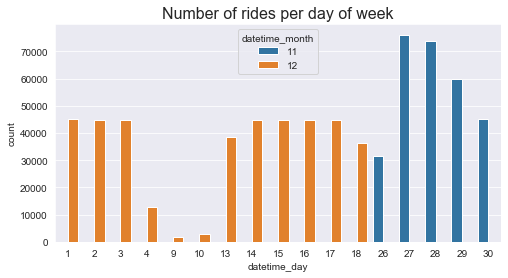

In [20]:
plt.figure(figsize=(8,4))
plt.title('Number of rides per day of week', fontsize=16)
sns.countplot(x='datetime_day', data=Rides, hue='datetime_month')

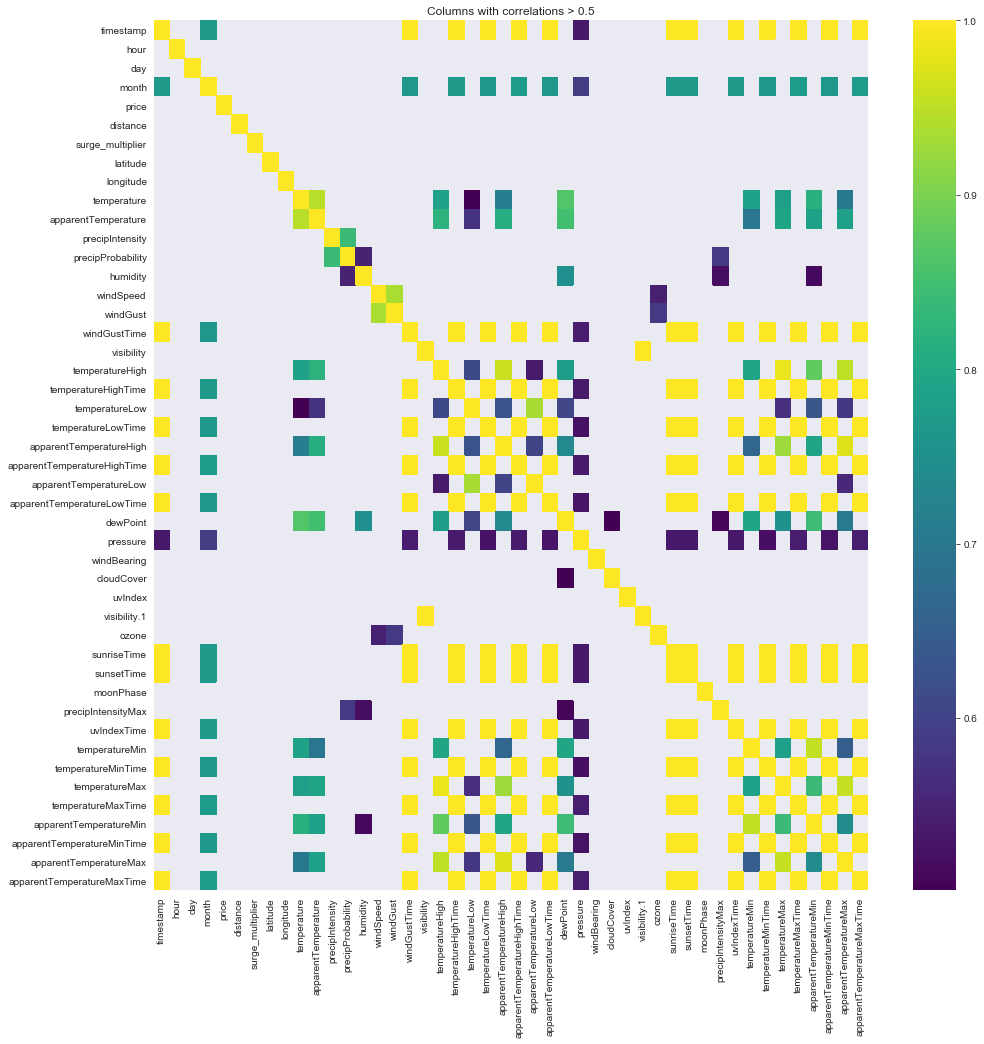

In [18]:
corrs = Rides.corr()
corrs[corrs < 0.5 ] = np.nan
plt.figure(figsize=(16,16))
plt.title('Columns with correlations > 0.5')
sns.heatmap(corrs, cmap='viridis') #, annot=True)